In [ ]:
# Kaggle API 설치
!pip install kaggle

In [ ]:
# Kaggle API Key 업로드
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hyeongjuseo","key":"bf963b7e53114ccef187d6c047d7930f"}'}

In [ ]:
# Kaggle API Key 설정
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# 데이터셋 다운로드
!kaggle datasets download rashadrmammadov/customer-churn-dataset

Dataset URL: https://www.kaggle.com/datasets/rashadrmammadov/customer-churn-dataset
License(s): CC0-1.0
customer-churn-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# 데이터셋 압축 해제
!unzip customer-churn-dataset.zip

Archive:  customer-churn-dataset.zip
replace customer_churn_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: customer_churn_data.csv  


In [ ]:
# pandas 라이브러리를 import 하고 df를 생성
import pandas as pd
df = pd.read_csv('customer_churn_data.csv')

In [ ]:
# 데이터를 잘 가져왔는지 확인
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,Male,0,No,Yes,23,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,CUST0001,Female,0,Yes,No,43,No,No phone service,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,CUST0002,Male,1,No,No,51,Yes,No,DSL,No,...,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,CUST0003,Male,1,No,No,72,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,CUST0004,Male,1,No,No,25,Yes,Yes,DSL,No,...,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes


In [ ]:
# 결측값이 있는지 확인
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
# categorical 특성, numerical 특성, target 특성을 분리
categorical_features = [
"gender",
"SeniorCitizen",
"Partner",
"Dependents",
"PhoneService",
"MultipleLines",
"InternetService",
"OnlineSecurity",
"OnlineBackup",
"DeviceProtection",
"TechSupport",
"StreamingTV",
"StreamingMovies",
"Contract",
"PaperlessBilling",
"PaymentMethod"
]
numerical_features = [ "tenure" , "MonthlyCharges" , "TotalCharges" ]
target = "Churn"

array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'TotalCharges'}>, <Axes: >]], dtype=object)

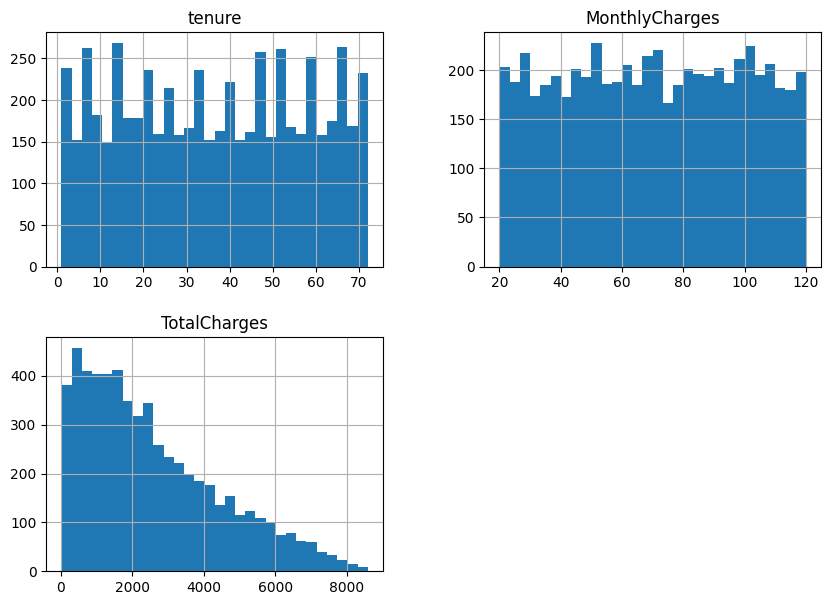

In [ ]:
# numerical 특성들의 히스토그램 확인
df[numerical_features].hist(bins = 30 , figsize = (10 , 7))

array([<Axes: title={'center': 'tenure'}>,
       <Axes: title={'center': 'MonthlyCharges'}>,
       <Axes: title={'center': 'TotalCharges'}>], dtype=object)

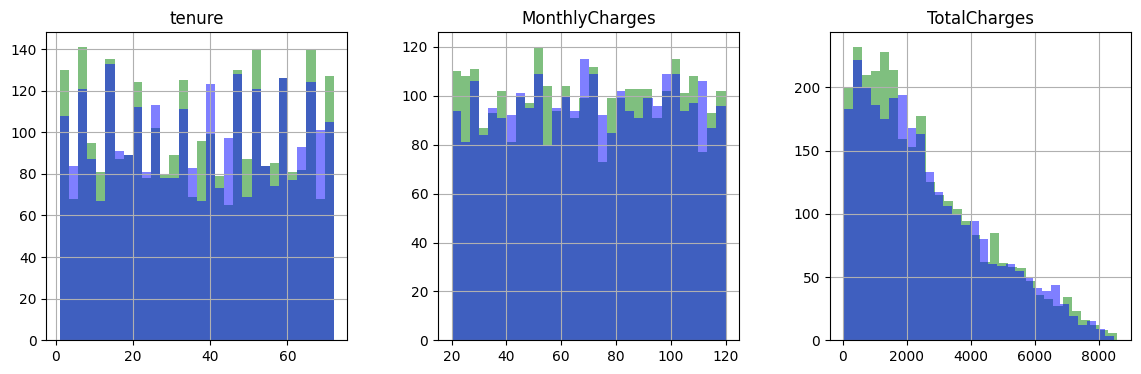

In [ ]:
# 고객이 이탈한 경우와 이탈하지 않은 경우를 분리해서 히스토그램을 확인
import matplotlib.pyplot as plt
fig , ax = plt.subplots(1 , 3 , figsize = (14 , 4))
df[df.Churn == "No"][numerical_features].hist(bins=30 , color="green" , alpha=0.5 , ax=ax)
df[df.Churn == "Yes"][numerical_features].hist(bins=30 , color="blue" , alpha=0.5 , ax=ax)

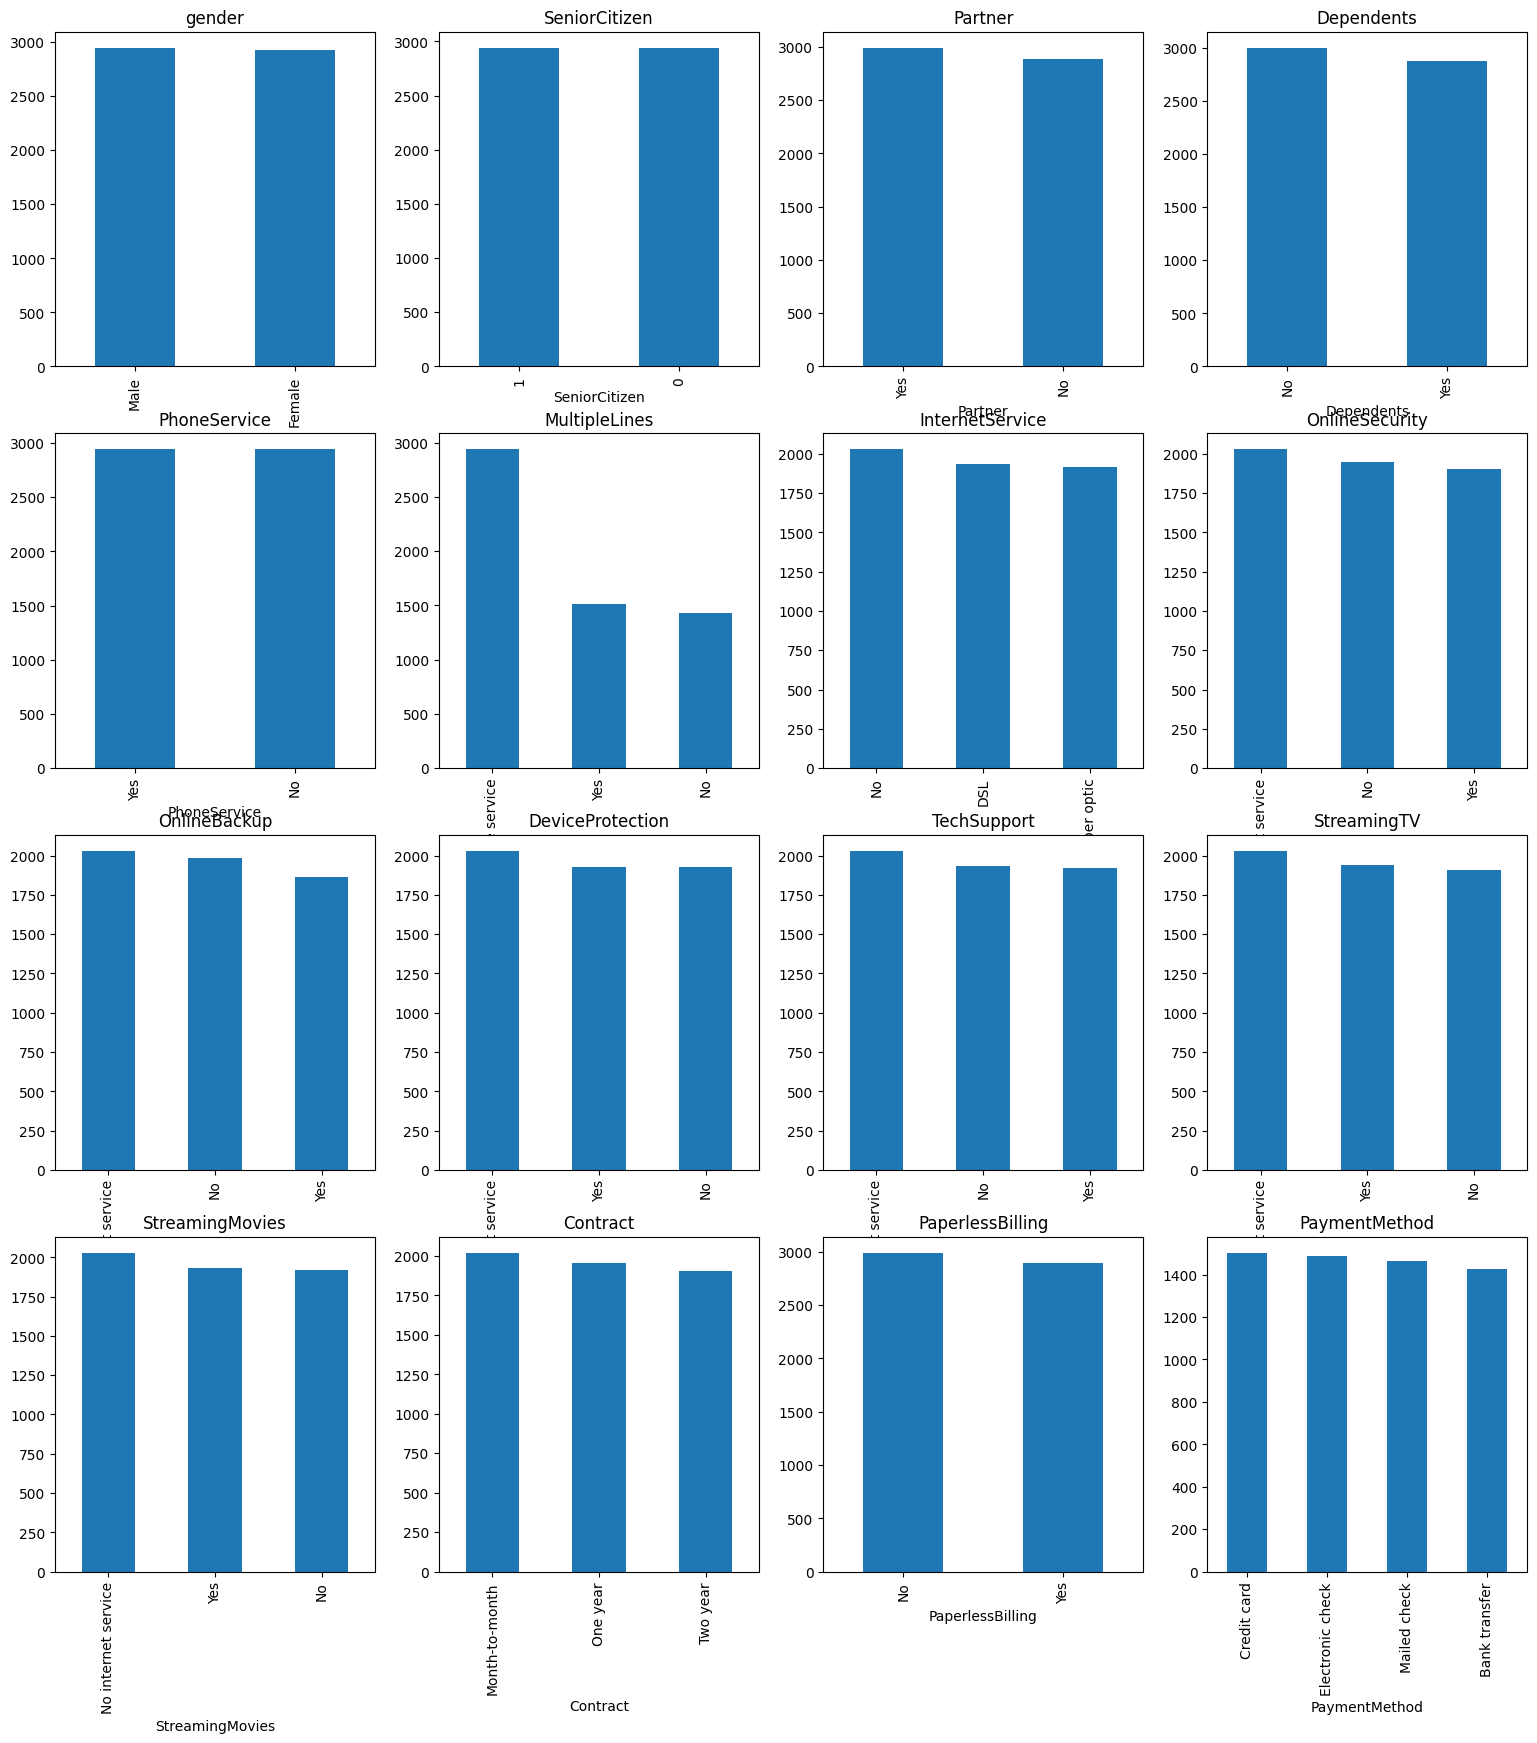

In [ ]:
# Categorical 특성의 데이터 수를 확인
ROWS , COLS = 4 , 4
fig , ax = plt.subplots(ROWS , COLS , figsize = (19 , 20))
row , col = 0 , 0 ,
for i , categorical_features in enumerate(categorical_features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    df[categorical_features].value_counts().plot(kind ='bar', ax= ax[row , col ]).set_title(categorical_features)

Text(0.5, 1.0, 'churned')

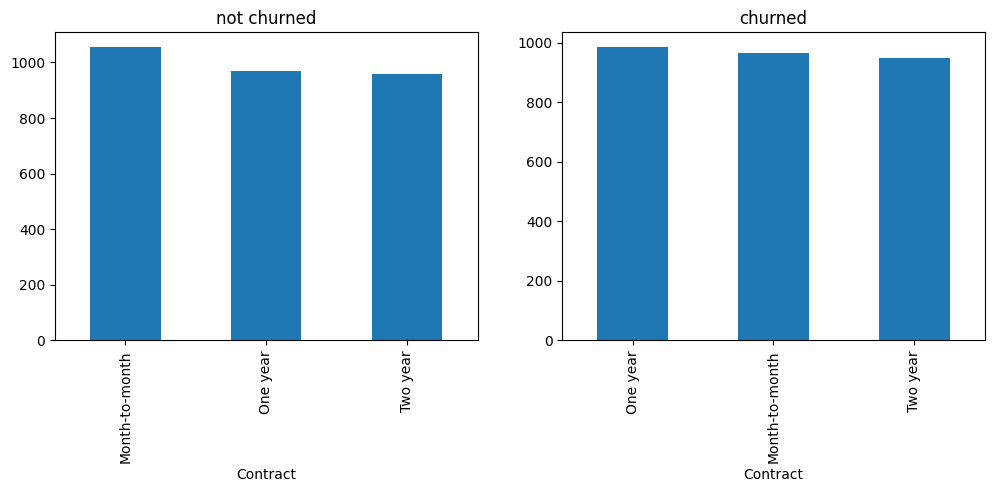

In [ ]:
# 계약 기간에 따라 이탈여부의 수를 확인
feature = 'Contract'
fig , ax = plt.subplots(1 , 2 , figsize = (12 , 4))
df[df.Churn == "No"][feature].value_counts(0).plot(kind = 'bar' , ax = ax[0]).set_title('not churned')
df[df.Churn == "Yes"][feature].value_counts(0).plot(kind = 'bar' , ax = ax[1]).set_title('churned')

Text(0.5, 1.0, 'churned')

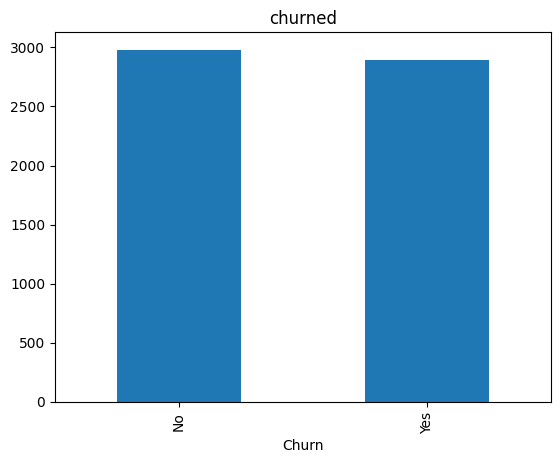

In [ ]:
# 종속변수의 데이터 불균형을 확인
df[target].value_counts().plot(kind = 'bar').set_title('churned')

In [ ]:
# 식별자인 customerID가 범주형이여서 제거
data = df.drop('customerID', axis=1)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,No,Yes,23,No,No phone service,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,Female,0,Yes,No,43,No,No phone service,DSL,Yes,No,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,Male,1,No,No,51,Yes,No,DSL,No,Yes,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,Male,1,No,No,72,Yes,Yes,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,Male,1,No,No,25,Yes,Yes,DSL,No,No,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes


In [ ]:
# 상관계수가 높은 gender, PhoneService, TotalCharges, MultipleLines 4개의 특징으로 학습하기 위해 나머지 필드 제거
data = data.drop(['SeniorCitizen',
                  'Partner',
                  'Dependents',
                  'tenure',
                  'InternetService',
                  'OnlineSecurity',
                  'OnlineBackup',
                  'DeviceProtection',
                  'TechSupport',
                  'StreamingTV',
                  'StreamingMovies',
                  'Contract',
                  'PaperlessBilling',
                  'PaymentMethod',
                  'MonthlyCharges'], axis=1)
data.head()

,gender,PhoneService,MultipleLines,TotalCharges,Churn
0,Male,No,No phone service,1146.55,No
1,Female,No,No phone service,4330.10,Yes
2,Male,Yes,No,4963.83,Yes
3,Male,Yes,Yes,7299.36,No
4,Male,Yes,Yes,1305.50,Yes


In [ ]:
# 범주형 변수를 인코딩
data = pd.get_dummies(data, drop_first=True)

data.head()

,TotalCharges,gender_Male,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,Churn_Yes
0,1146.55,True,False,True,False,False
1,4330.10,False,False,True,False,True
2,4963.83,True,True,False,False,True
3,7299.36,True,True,False,True,False
4,1305.50,True,True,False,True,True


In [ ]:
# TotalCharges를 StandardScaler를 이용해서 스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[[ 'TotalCharges']] = scaler.fit_transform(data[[ 'TotalCharges']])

data.head()

,TotalCharges,gender_Male,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,Churn_Yes
0,-0.743650,True,False,True,False,False
1,0.923257,False,False,True,False,True
2,1.255078,True,True,False,False,True
3,2.477961,True,True,False,True,False
4,-0.660423,True,True,False,True,True


In [ ]:
# 데이터셋 분리
from sklearn.model_selection import train_test_split

X = data.drop(columns=['Churn_Yes'])
y = data['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# 로지스틱 회귀 분석
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# 예측 결과와 실제 결과를 비교해서 정확도 계산
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred1 = log_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred1)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5028344671201814


In [ ]:
# 혼동행렬 계산
conf_matrix = confusion_matrix(y_test, y_pred1)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[844  30]
 [847  43]]


In [ ]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

       False       0.50      0.97      0.66       874
        True       0.59      0.05      0.09       890

    accuracy                           0.50      1764
   macro avg       0.54      0.51      0.37      1764
weighted avg       0.54      0.50      0.37      1764



In [ ]:
# 앙상블 기법의 랜덤 포레스트를 이용하여 학습
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# 예측 결과와 실제 결과를 비교해서 정확도 계산
y_pred2 = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5011337868480725


In [ ]:
# 혼동행렬 계산
conf_matrix = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[455 419]
 [461 429]]


In [ ]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

       False       0.50      0.52      0.51       874
        True       0.51      0.48      0.49       890

    accuracy                           0.50      1764
   macro avg       0.50      0.50      0.50      1764
weighted avg       0.50      0.50      0.50      1764

